# Adolescent Insomnia Data Analysis

In [1]:
!ls

ado_insom_3.ipynb
adolescent_insomnia_1.ipynb
adolescent_insomnia_2.ipynb
childiso
ci1.jpeg
ci2.jpeg
ci3.jpeg
insom_github
insomniaArchive
insomnia_data.csv
insomnia_data_dictionary.csv
insomnia_item_level_data.csv
prbm-212923-positive-self-relation-scale.pdf
removeCells


<img src="ci1.jpeg" alt="drawing" style="width:200px;"/>


## Introduction

This notebook presents an exploratory analysis of the Adolescent Insomnia Study dataset. The dataset is composed of several CSV files that contain demographic, clinical, and item-level data from a study on insomnia in adolescents.

The goal of this analysis is to use logistic regression to predict the sex of the participants based on various clinical measures. This is a preliminary analysis and the choice of features is based on their potential relevance to the target variable.

The analysis is divided into several steps, each of which is described in detail in the following sections.

In [1]:
import pandas as pd
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load the data
insomnia_data = pd.read_csv('insomnia_data.csv')
insomnia_item_level_data = pd.read_csv('insomnia_item_level_data.csv')
insomnia_data_dictionary = pd.read_csv('insomnia_data_dictionary.csv')

#print(insomnia_data_dictionary['Columns'])


#3:sex, ,4:age, 16: ISI_total , PSQI_total, BDI_total etc

selected_rows = insomnia_data_dictionary['Columns'].iloc[[3,4,16,17,18]]  # Replace with your desired indices


print(selected_rows)

3            Sex
4            Age
16     ISI_total
17    PSQI_total
18     BDI_total
Name: Columns, dtype: object


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#display(insomnia_data_dictionary)

#x = insomnia_data_dictionary['Columns'].iloc(54)

type(insomnia_data_dictionary.columns)
sub_df = insomnia_data[['Sex', 'Age','ISI_total','PSQI_total','BDI_total']]


print(sub_df.head())

print(sub_df)

   Sex   Age  ISI_total  PSQI_total  BDI_total
0    0  19.3          0           0          0
1    0  19.3          1           2          3
2    1  18.8          2           4          0
3    0  18.8          1           5          2
4    1  19.6         10           7          5
    Sex   Age  ISI_total  PSQI_total  BDI_total
0     0  19.3          0           0          0
1     0  19.3          1           2          3
2     1  18.8          2           4          0
3     0  18.8          1           5          2
4     1  19.6         10           7          5
5     0  19.1          0           4          0
6     0  19.0          0           1          3
7     1  20.1          5           5          0
8     1  19.1          3           6          6
9     0  19.4          2           1          1
10    1  18.1          4           4          0
11    0  18.9          7           6          0
12    1  18.9          0           0          0
13    1  19.0          7           5          

In [3]:
# Select features and target
features = sub_df[['Age', 'ISI_total', 'PSQI_total', 'BDI_total']]
target = sub_df['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy Score: 0.6842105263157895
Confusion Matrix:
[[10  0]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9

    accuracy                           0.68        19
   macro avg       0.81      0.67      0.63        19
weighted avg       0.80      0.68      0.64        19



## Introduction

This notebook presents an exploratory analysis of the Adolescent Insomnia Study dataset. The dataset is composed of several CSV files that contain demographic, clinical, and item-level data from a study on insomnia in adolescents.

The goal of this analysis is to use logistic regression to predict the sex of the participants based on various clinical measures. This is a preliminary analysis and the choice of features is based on their potential relevance to the target variable.

The analysis is divided into several steps, each of which is described in detail in the following sections.

In [4]:
# Select features and target
features = sub_df[['Age', 'ISI_total', 'PSQI_total', 'BDI_total']]
target = sub_df['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy Score: 0.6842105263157895
Confusion Matrix:
[[10  0]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9

    accuracy                           0.68        19
   macro avg       0.81      0.67      0.63        19
weighted avg       0.80      0.68      0.64        19



Now let's visualize. We can take advantage of seaborn's built in pairplot function.The `pairplot` function from the seaborn library creates a grid of scatter plots for every pair of variables (columns) in your dataframe. This is also known as a "scatterplot matrix". 

Here's what it shows:

- Each cell in the grid represents a scatter plot between two variables. For example, if you have three variables 'A', 'B', and 'C', you will have scatter plots for 'A' vs. 'B', 'A' vs. 'C', and 'B' vs. 'C'. 

- The diagonal of the grid (from top left to bottom right) usually shows a histogram or a kernel density estimate of each variable. This is because a scatter plot of a variable with itself wouldn't be very informative.

- The scatter plots can show the relationships between variables. For example, if points in a scatter plot follow a straight line (either ascending or descending), it suggests a linear relationship between the variables.

- The scatter plots can also show patterns in the data, such as clusters or outliers.

In summary, a scatterplot matrix is a great way to quickly visualize and understand the relationships between multiple variables in your dataframe. However, it can be overwhelming and less informative if your dataframe has too many variables. In such cases, it might be better to select a subset of variables that you're most interested in.


/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


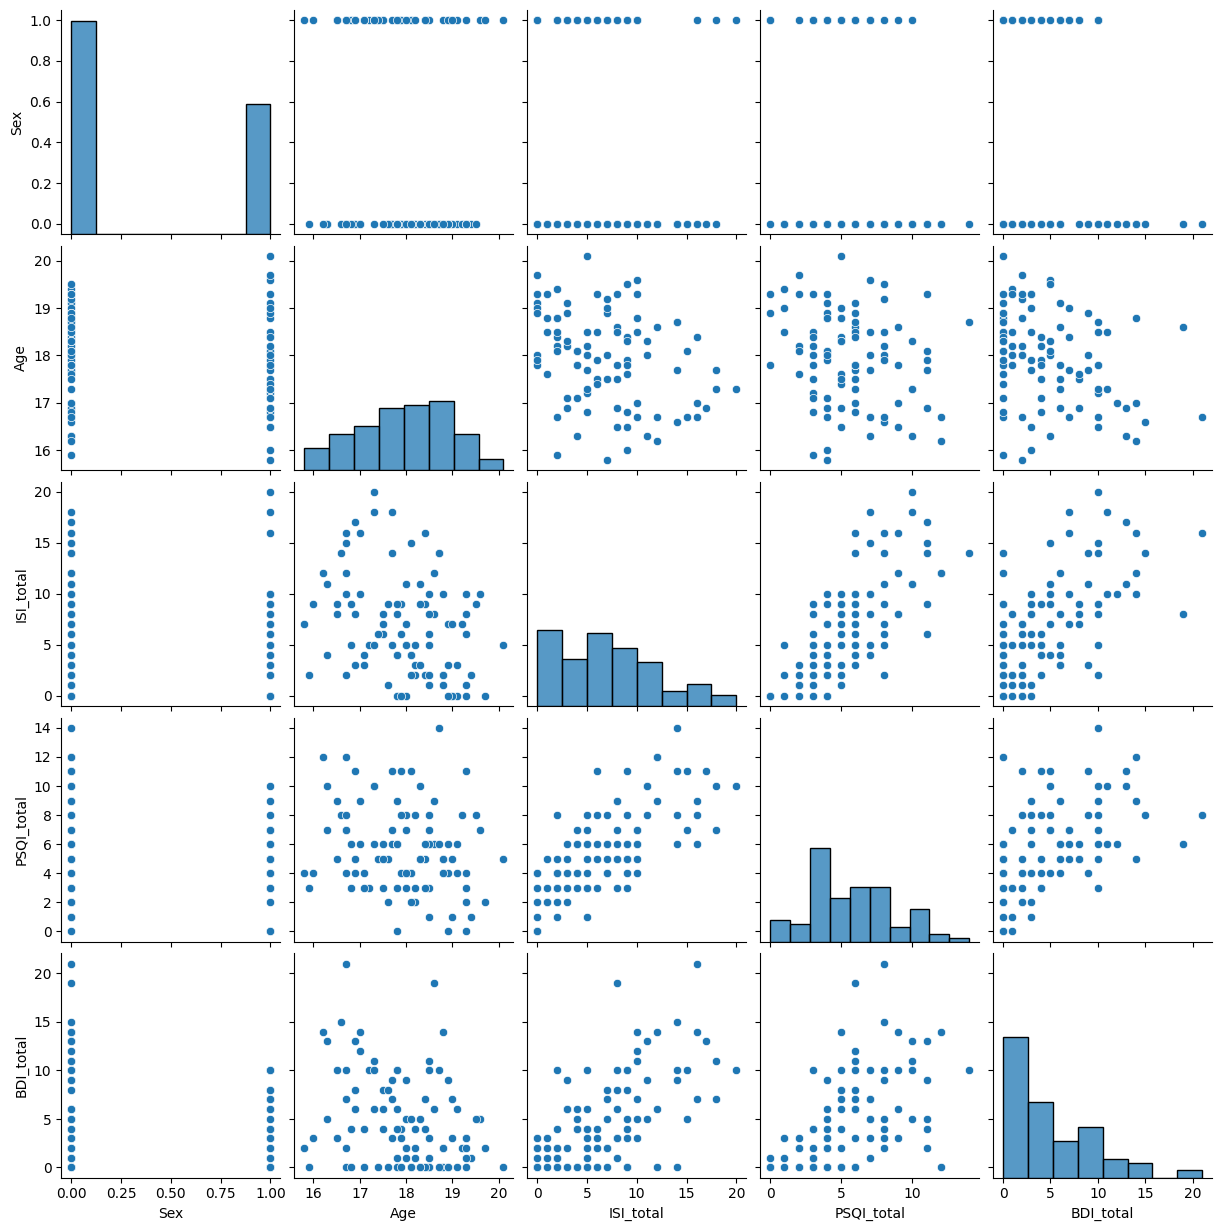

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_scatter_plots(df):
    # Create a pairplot for all combinations of columns
    plot = sns.pairplot(df)

    # Display the plot
    plt.show()

# Call the function with your dataframe
create_scatter_plots(sub_df)


Notice that genderbeing a binary feature doesn't contribute much visually. 

Accuracy Score: 0.631578947368421
Confusion Matrix:
[[9 1]
 [6 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.75      0.33      0.46         9

    accuracy                           0.63        19
   macro avg       0.68      0.62      0.59        19
weighted avg       0.67      0.63      0.60        19



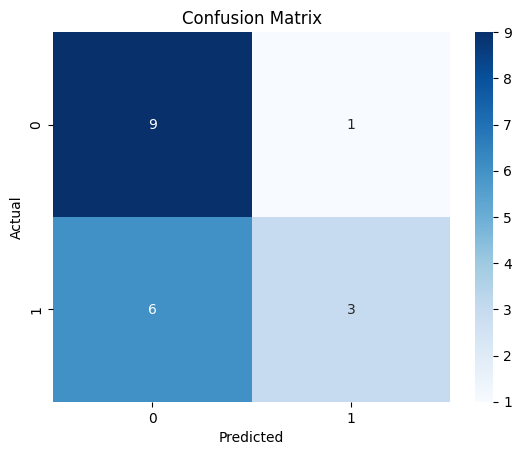

In [6]:


# Select features and target
features = insomnia_data[['Age', 'ISI_total', 'PSQI_total', 'BDI_total', 'STAI_Y_total', 'NEO_neuroticism']]
target = insomnia_data['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

Now let's take a look at the data with the goal of implementing another machine learning algorithm. In particular Logistic Regression. Recall that this is a classification algorithm. We will be using it to try and predict gender based off of the other features of our reduced dataframe. 



### The imports

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### The split

In [8]:
X = sub_df[['Age','ISI_total','PSQI_total','BDI_total']]
y = sub_df['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Instantiate an instance of the model

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
#Make predictions and evaluate your model
#python
#Copy code
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
#This is a very basic example and there's a lot more you could do, such as hyperparameter tuning, cross-validation, and trying different machine learning models. But this should give you a good starting point.







Accuracy: 0.631578947368421
Confusion Matrix:
[[10  0]
 [ 7  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.22      0.36         9

    accuracy                           0.63        19
   macro avg       0.79      0.61      0.55        19
weighted avg       0.78      0.63      0.56        19



In [11]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://packagecloud.io/pimutils/khal/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


AUC: 0.5111111111111111


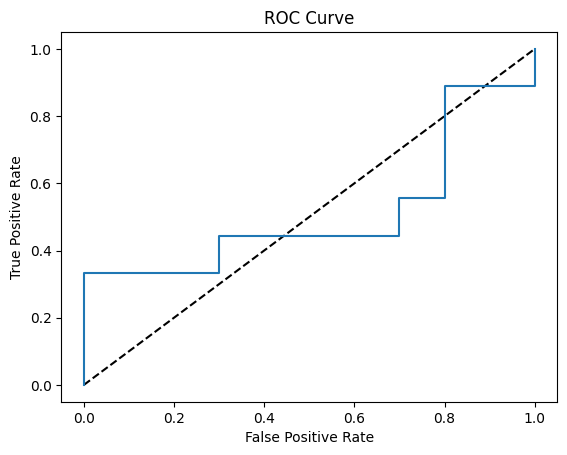

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute and print AUC score
print("AUC: {}".format(auc(fpr, tpr)))

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
#This code will create a ROC curve and compute the Area Under the Curve (AUC) score, which is a common metric for evaluating the performance of binary classifiers.







Need a refresher on "Roc" curves? :
    
    Sure, the Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. Here's what these terms mean:

- **True Positive Rate (TPR)**: Also known as sensitivity, recall or probability of detection, measures the proportion of actual positives that are correctly identified as such. It is calculated as `TP / (TP + FN)` where TP is the number of true positives and FN is the number of false negatives.

- **False Positive Rate (FPR)**: Also known as the fall-out or probability of false alarm, measures the proportion of actual negatives that are incorrectly identified as positives. It is calculated as `FP / (FP + TN)` where FP is the number of false positives and TN is the number of true negatives.

The diagonal line in the ROC plot, often referred to as the line of no-discrimination, represents a random classifier (i.e., a classifier that makes random guesses). A good classifier stays as far away from that line as possible (toward the top-left corner).

The area under the ROC curve, also known as AUC (Area Under the Curve), provides a measure of how well a parameter can distinguish between two diagnostic groups (diseased/normal). The closer the AUC to 1, the better the classifier. An AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients as diseased or normal no better than a random guess), and an AUC of 1.0 suggests perfect discrimination.

In summary, the ROC curve and AUC score are tools for evaluating the performance of a binary classifier, and they provide a way to assess the trade-off between the true positive rate and false positive rate for different threshold settings.

In [13]:
# roc curve code if you have a newer version of sklearn (apparently)
#import sklearn
#from sklearn.metrics import plot_roc_curv

#plot_roc_curve(model, X_test, y_test)
#plt.show()

In [14]:
# Display the first few rows of each dataframe to understand the structure of the data
print('Insomnia Data:')
display(insomnia_data.head())
print('\nInsomnia Item Level Data:')
display(insomnia_item_level_data.head())
print('\nInsomnia Data Dictionary:')
display(insomnia_data_dictionary.head())

Insomnia Data:


,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,Unnamed: 95,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
0,sub_001,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,16.0,NaN,0,0,0,5.43,5.8,5.83,6.00,5.75,6,6.0,1,5.25,3.5,28.75,16,30,9,7,4,4,3,43,12,30,25,18,33,58,7,1,6,5,4,23,23,68,18,15,13,9,6,7,0.0,13,11,3,5,7,7,6,6,4.0,3.0,35,15,10,4.0,16,7,5,12,13,4,6,9,4,14,14,9,13,13,6,87,20,10.0,26,12,13,NaN,-1.413051,-1.913658,-1.015150,2.293926,1.035355589,2.233510,1.431228,0.679165,0.915368,0.362017,-0.980406,1.873926,-0.012113,-0.647679568,-0.588203,-1.148211,-0.913369,-0.716090,-1.326579,-0.446552,-1.209172,0.071129,-1.204374,0.268284,-0.216305,-1.372999,0.550206,1.069979,1.507699,-1.299596,0.728257,0.357673,-0.266314,0.109551,1.123001,-0.028514,2.387628,1.460379,-0.633903,-0.493799,-0.586770,-1.502821,-0.595162,-1.068285,-0.942057,-1.266461,-0.770317,-1.088046,-0.774428,-0.870438,-1.317525,-1.002415,-0.782853,-0.238062,-0.961820,-0.824138,1.616179,-0.831459,-0.988063,0.547941,1.110286,-0.541013,0.157951,0.002955,-0.783581,2.424510,1.012818,-0.239368,-0.701562,2.215354,0.740137,-1.122805,1.905727,-0.114565,1.083087,-0.656051,0.538016,0.575806
1,sub_002,0,0,0,0,19.3,0,0,0,0,1,0,0,1,0,13.0,NaN,1,2,3,5.00,5.6,4.50,6.00,5.75,6,5.5,2,4.50,3.5,11.81,15,31,9,6,5,4,3,47,9,23,24,18,30,57,6,1,4,5,4,20,18,68,10,14,19,11,5,9,0.0,15,9,3,5,7,7,5,5,4.0,5.0,35,14,9,4.0,15,10,5,12,12,5,5,5,4,8,8,15,9,14,8,81,12,10.0,26,12,13,NaN,-1.209039,-1.237831,-0.386198,1.256609,0.716262391,0.851207,1.431228,0.679165,0.915368,-1.357563,-0.252761,0.866249,-0.012113,-1.909842154,-0.766163,-1.072723,-0.91


Insomnia Item Level Data:


,Unnamed: 0,Pittsburgh Sleep Quality Index (PSQI),Pittsburgh Sleep Quality Index (PSQI).1,Pittsburgh Sleep Quality Index (PSQI).2,Pittsburgh Sleep Quality Index (PSQI).3,Pittsburgh Sleep Quality Index (PSQI).4,Pittsburgh Sleep Quality Index (PSQI).5,Pittsburgh Sleep Quality Index (PSQI).6,Pittsburgh Sleep Quality Index (PSQI).7,Pittsburgh Sleep Quality Index (PSQI).8,Pittsburgh Sleep Quality Index (PSQI).9,Pittsburgh Sleep Quality Index (PSQI).10,Pittsburgh Sleep Quality Index (PSQI).11,Pittsburgh Sleep Quality Index (PSQI).12,Pittsburgh Sleep Quality Index (PSQI).13,Pittsburgh Sleep Quality Index (PSQI).14,Pittsburgh Sleep Quality Index (PSQI).15,Pittsburgh Sleep Quality Index (PSQI).16,Pittsburgh Sleep Quality Index (PSQI).17,Pittsburgh Sleep Quality Index (PSQI).18,Pittsburgh Sleep Quality Index (PSQI).19,Pittsburgh Sleep Quality Index (PSQI).20,Insomnia Severity Index (ISI),Insomnia Severity Index (ISI).1,Insomnia Severity Index (ISI).2,Insomnia Severity Index (ISI).3,Insomnia Severity Index (ISI).4,Insomnia Severity Index (ISI).5,Insomnia Severity Index (ISI).6,Adverse Childhood Experiences (ACE),Adverse Childhood Experiences (ACE).1,Adverse Childhood Experiences (ACE).2,Adverse Childhood Experiences (ACE).3,Adverse Childhood Experiences (ACE).4,Adverse Childhood Experiences (ACE).5,Adverse Childhood Experiences (ACE).6,Adverse Childhood Experiences (ACE).7,Adverse Childhood Experiences (ACE).8,Adverse Childhood Experiences (ACE).9,Beck Depression Inventory (BDI),Beck Depression Inventory (BDI).1,Beck Depression Inventory (BDI).2,Beck Depression Inventory (BDI).3,Beck Depression Inventory (BDI).4,Beck Depression Inventory (BDI).5,Beck Depression Inventory (BDI).6,Beck Depression Inventory (BDI).7,Beck Depression Inventory (BDI).8,Beck Depression Inventory (BDI).9,Beck Depression Inventory (BDI).10,Beck Depression Inventory (BDI).11,Beck Depression Inventory (BDI).12,Beck Depression Inventory (BDI).13,Beck Depression Inventory (BDI).14,Beck Depression Inventory (BDI).15,Beck Depression Inventory (BDI).16,Beck Depression Inventory (BDI).17,Beck Depression Inventory (BDI).18,Beck Depression Inventory (BDI).19,Beck Depression Inventory (BDI).20,Adolescent Stress Questionnaire (ASQ),Adolescent Stress Questionnaire (ASQ).1,Adolescent Stress Questionnaire (ASQ).2,Adolescent Stress Questionnaire (ASQ).3,Adolescent Stress Questionnaire (ASQ).4,Adolescent Stress Questionnaire (ASQ).5,Adolescent Stress Questionnaire (ASQ).6,Adolescent Stress Questionnaire (ASQ).7,Adolescent Stress Questionnaire (ASQ).8,Adolescent Stress Questionnaire (ASQ).9,Adolescent Stress Questionnaire (ASQ).10,Adolescent Stress Questionnaire (ASQ).11,Adolescent Stress Questionnaire (ASQ).12,Adolescent Stress Questionnaire (ASQ).13,Adolescent Stress Questionnaire (ASQ).14,Adolescent Stress Questionnaire (ASQ).15,Adolescent Stress Questionnaire (ASQ).16,Adolescent Stress Questionnaire (ASQ).17,Adolescent Stress Questionnaire (ASQ).18,Adolescent Stress Questionnaire (ASQ).19,Adolescent Stress Questionnaire (ASQ).20,Adolescent Stress Questionnaire (ASQ).21,Adolescent Stress Questionnaire (ASQ).22,Adolescent Stress Questionnaire (ASQ).23,Adolescent Stress Questionnaire (ASQ).24,Adolescent Stress Questionnaire (ASQ).25,Adolescent Stress Questionnaire (ASQ).26,Adolescent Stress Questionnaire (ASQ).27,Adolescent Stress Questionnaire (ASQ).28,Adolescent Stress Questionnaire (ASQ).29,Adolescent Stress Questionnaire (ASQ).30,Adolescent Stress Questionnaire (ASQ).31,Adolescent Stress Questionnaire (ASQ).32,Adolescent Stress Questionnaire (ASQ).33,Adolescent Stress Questionnaire (ASQ).34,Adolescent Stress Questionnaire (ASQ).35,Adolescent Stress Questionnaire (ASQ).36,Adolescent Stress Questionnaire (ASQ).37,Adolescent Stress Questionnaire (ASQ).38,Adolescent Stress Questionnaire (ASQ).39,Adolescent Stress Questionnaire (ASQ).40,Adolescent Stress Questionnaire (ASQ).41,Adolescent Stress Questionnaire (ASQ).42,Adolescent Stress Questionnaire (ASQ).43,Adolescent Stress Questi


Insomnia Data Dictionary:


,Columns,Description
0,Group,"INSOMNIA= 1, CONTROL=0"
1,SubGroup,"clean INSOMNIA= 2, subclinical INSOMNIA = 1, C..."
2,Remote,"Remote data collection = 1, In person data col..."
3,Sex,"MALE = 1, FEMALE = 0"
4,Age,Years


In [15]:
print(insomnia_data_dictionary.head(50))

                  Columns                                        Description
0                   Group                             INSOMNIA= 1, CONTROL=0
1                SubGroup  clean INSOMNIA= 2, subclinical INSOMNIA = 1, C...
2                  Remote  Remote data collection = 1, In person data col...
3                     Sex                               MALE = 1, FEMALE = 0
4                     Age                                              Years
5         American_Indian                                               race
6                   Asian                                               race
7         Native_Hawaiian                                               race
8                   Black                                               race
9                   White                                               race
10           unknown_Race                                               race
11               Hispanic                                          ethnicity

In [16]:
# Summary statistics for insomnia_data
insomnia_data.describe(include='all')

,ID,Group,SubGroup,Remote,Sex,Age,American_Indian,Asian,Native_Hawaiian,Black,White,unknown_Race,Hispanic,NotHispanic,unknown_Etnicity,PDS_FEMALE,PDS_MALE,ISI_total,PSQI_total,BDI_total,ASHS_total,ASHS_physiological,ASHS_cognitive,ASHS_emotional,ASHS_SleepEnvirnmont,ASHS_DaytimeSleep,ASHS_substances,ASHS_bedtimeRoutine,ASHS_sleepStability,ASHS_BedroomSharing,DBAS_total,FIRST_total,GCTI_total,GCTI_anxiety,GCTI_reflection,GCTI_worries,GCTI_thoughts,GCTI_negativeAffect,STAI_Y_total,NEO_neuroticism,NEO_extraversion,NEO_openness,NEO_agreeableness,NEO_Conscientiousness,MEQr_total,PSRS_PrR,PSRS_RWO,PSRS_RSC,PSRS_FRa,PSRS_RSE,PSRS_total,PSS_total,TCQI_R_Total,TCQIR_Aggressive_supression,TCQIR_cognitive_distraction,TCQIR_reappraisal,TCQIR_behavtioral_distraction,TCQIR_social_avoidance,TCQIR_worry,ACE_tot,asq_home,asq_school,asq_attendance,asq_romantic,asq_peer,asq_teacher,asq_future,asq_leisure,asq_finance,asq_responsibility,casq_total,casq_sleepy,casq_alert,cope_disengage_su,cope_growth,cope_disengage_mental,cope_emotions,cope_socialsupp_instr,cope_active,cope_denial,cope_religion,cope_humor,cope_disengage_emo,cope_restraint,cope_socialsupp_emo,cope_acccept,cope_suppression,cope_planning,ders_nonaccpetance,ders_total,ders_goals,ders_impulse,ders_awareness,ders_strategies,ders_clarity,Unnamed: 95,ZISI_total,ZPSQI_total,ZBDI_total,ZASHS_total,ZASHS_physiological,ZASHS_cognitive,ZASHS_emotional,ZASHS_SleepEnvirnmont,ZASHS_DaytimeSleep,ZASHS_substances,ZASHS_bedtimeRoutine,ZASHS_sleepStability,ZASHS_BedroomSharing,ZDBAS_total,ZFIRST_total,ZGCTI_total,ZGCTI_anxiety,ZGCTI_reflection,ZGCTI_worries,ZGCTI_thoughts,ZGCTI_negativeAffect,ZSTAI_Y_total,ZNEO_neuroticism,ZNEO_extraversion,ZNEO_openness,ZNEO_agreeableness,ZNEO_Conscientiousness,ZMEQr_total,ZPSRS_PrR,ZPSRS_RWO,ZPSRS_RSC,ZPSRS_FRa,ZPSRS_RSE,ZPSRS_total,ZPSS_total,ZTCQI_R_Total,ZTCQIR_Aggressive_supression,ZTCQIR_cognitive_distraction,ZTCQIR_reappraisal,ZTCQIR_behavtioral_distraction,ZTCQIR_social_avoidance,ZTCQIR_worry,ZACE_tot,Zasq_home,Zasq_school,Zasq_attendance,Zasq_romantic,Zasq_peer,Zasq_teacher,Zasq_future,Zasq_leisure,Zasq_finance,Zasq_responsibility,Zcasq_total,Zcasq_sleepy,Zcasq_alert,Zcope_growth,Zcope_disengage_mental,Zcope_emotions,Zcope_socialsupp_instr,Zcope_active,Zcope_denial,Zcope_religion,Zcope_humor,Zcope_disengage_emo,Zcope_restraint,Zcope_socialsupp_emo,Zcope_disengage_su,Zcope_acccept,Zcope_suppression,Zcope_planning,Zders_nonaccpetance,Zders_goals,Zders_impulse,Zders_awareness,Zders_strategies,Zders_clarity,ZDERS_total
count,95,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.0,59.000000,36.000000,95.000000,95.000000,95.000000,95.000000,95,95.000000,95.000000,95.000000,95.000000,93.000000,95.000000,95.000000,93.000000,95,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,94.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,94.000000,94.000000,95.000000,95.000000,95.000000,94.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,94,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,94.000000,95.000000,95.000000,95.000000,0.0,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,95,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,95,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+

In [17]:
# Summary statistics for insomnia_item_level_data
insomnia_item_level_data.describe(include='all')

,Unnamed: 0,Pittsburgh Sleep Quality Index (PSQI),Pittsburgh Sleep Quality Index (PSQI).1,Pittsburgh Sleep Quality Index (PSQI).2,Pittsburgh Sleep Quality Index (PSQI).3,Pittsburgh Sleep Quality Index (PSQI).4,Pittsburgh Sleep Quality Index (PSQI).5,Pittsburgh Sleep Quality Index (PSQI).6,Pittsburgh Sleep Quality Index (PSQI).7,Pittsburgh Sleep Quality Index (PSQI).8,Pittsburgh Sleep Quality Index (PSQI).9,Pittsburgh Sleep Quality Index (PSQI).10,Pittsburgh Sleep Quality Index (PSQI).11,Pittsburgh Sleep Quality Index (PSQI).12,Pittsburgh Sleep Quality Index (PSQI).13,Pittsburgh Sleep Quality Index (PSQI).14,Pittsburgh Sleep Quality Index (PSQI).15,Pittsburgh Sleep Quality Index (PSQI).16,Pittsburgh Sleep Quality Index (PSQI).17,Pittsburgh Sleep Quality Index (PSQI).18,Pittsburgh Sleep Quality Index (PSQI).19,Pittsburgh Sleep Quality Index (PSQI).20,Insomnia Severity Index (ISI),Insomnia Severity Index (ISI).1,Insomnia Severity Index (ISI).2,Insomnia Severity Index (ISI).3,Insomnia Severity Index (ISI).4,Insomnia Severity Index (ISI).5,Insomnia Severity Index (ISI).6,Adverse Childhood Experiences (ACE),Adverse Childhood Experiences (ACE).1,Adverse Childhood Experiences (ACE).2,Adverse Childhood Experiences (ACE).3,Adverse Childhood Experiences (ACE).4,Adverse Childhood Experiences (ACE).5,Adverse Childhood Experiences (ACE).6,Adverse Childhood Experiences (ACE).7,Adverse Childhood Experiences (ACE).8,Adverse Childhood Experiences (ACE).9,Beck Depression Inventory (BDI),Beck Depression Inventory (BDI).1,Beck Depression Inventory (BDI).2,Beck Depression Inventory (BDI).3,Beck Depression Inventory (BDI).4,Beck Depression Inventory (BDI).5,Beck Depression Inventory (BDI).6,Beck Depression Inventory (BDI).7,Beck Depression Inventory (BDI).8,Beck Depression Inventory (BDI).9,Beck Depression Inventory (BDI).10,Beck Depression Inventory (BDI).11,Beck Depression Inventory (BDI).12,Beck Depression Inventory (BDI).13,Beck Depression Inventory (BDI).14,Beck Depression Inventory (BDI).15,Beck Depression Inventory (BDI).16,Beck Depression Inventory (BDI).17,Beck Depression Inventory (BDI).18,Beck Depression Inventory (BDI).19,Beck Depression Inventory (BDI).20,Adolescent Stress Questionnaire (ASQ),Adolescent Stress Questionnaire (ASQ).1,Adolescent Stress Questionnaire (ASQ).2,Adolescent Stress Questionnaire (ASQ).3,Adolescent Stress Questionnaire (ASQ).4,Adolescent Stress Questionnaire (ASQ).5,Adolescent Stress Questionnaire (ASQ).6,Adolescent Stress Questionnaire (ASQ).7,Adolescent Stress Questionnaire (ASQ).8,Adolescent Stress Questionnaire (ASQ).9,Adolescent Stress Questionnaire (ASQ).10,Adolescent Stress Questionnaire (ASQ).11,Adolescent Stress Questionnaire (ASQ).12,Adolescent Stress Questionnaire (ASQ).13,Adolescent Stress Questionnaire (ASQ).14,Adolescent Stress Questionnaire (ASQ).15,Adolescent Stress Questionnaire (ASQ).16,Adolescent Stress Questionnaire (ASQ).17,Adolescent Stress Questionnaire (ASQ).18,Adolescent Stress Questionnaire (ASQ).19,Adolescent Stress Questionnaire (ASQ).20,Adolescent Stress Questionnaire (ASQ).21,Adolescent Stress Questionnaire (ASQ).22,Adolescent Stress Questionnaire (ASQ).23,Adolescent Stress Questionnaire (ASQ).24,Adolescent Stress Questionnaire (ASQ).25,Adolescent Stress Questionnaire (ASQ).26,Adolescent Stress Questionnaire (ASQ).27,Adolescent Stress Questionnaire (ASQ).28,Adolescent Stress Questionnaire (ASQ).29,Adolescent Stress Questionnaire (ASQ).30,Adolescent Stress Questionnaire (ASQ).31,Adolescent Stress Questionnaire (ASQ).32,Adolescent Stress Questionnaire (ASQ).33,Adolescent Stress Questionnaire (ASQ).34,Adolescent Stress Questionnaire (ASQ).35,Adolescent Stress Questionnaire (ASQ).36,Adolescent Stress Questionnaire (ASQ).37,Adolescent Stress Questionnaire (ASQ).38,Adolescent Stress Questionnaire (ASQ).39,Adolescent Stress Questionnaire (ASQ).40,Adolescent Stress Questionnaire (ASQ).41,Adolescent Stress Questionnaire (ASQ).42,Adolescent Stress Questionnaire (ASQ).43,Adolescent Stress Questi

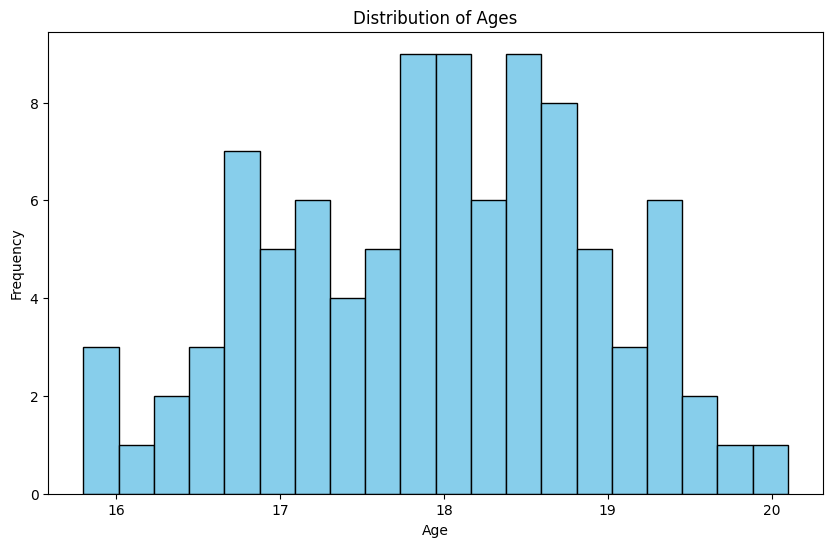

In [18]:
import matplotlib.pyplot as plt

# Histogram for 'Age'
plt.figure(figsize=(10, 6))
plt.hist(insomnia_data['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

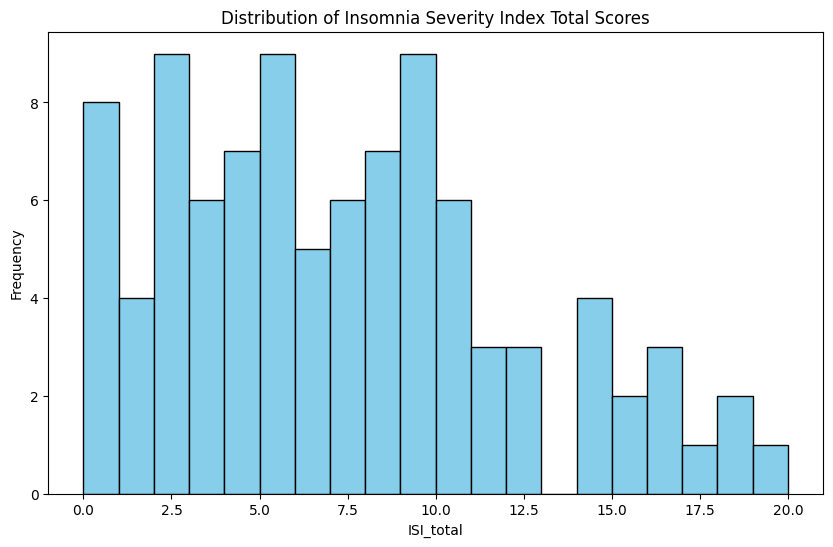

In [19]:
# Histogram for 'ISI_total'
plt.figure(figsize=(10, 6))
plt.hist(insomnia_data['ISI_total'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Insomnia Severity Index Total Scores')
plt.xlabel('ISI_total')
plt.ylabel('Frequency')
plt.show()

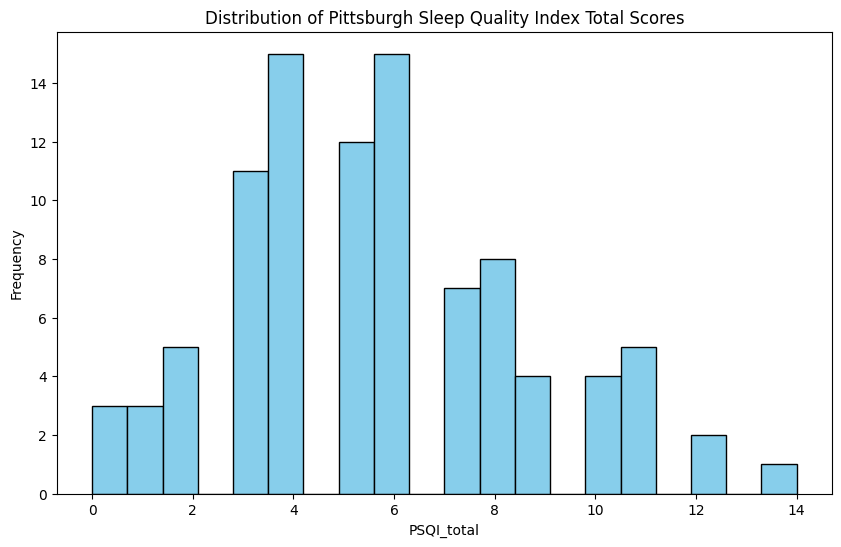

In [20]:
# Histogram for 'PSQI_total'
plt.figure(figsize=(10, 6))
plt.hist(insomnia_data['PSQI_total'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Pittsburgh Sleep Quality Index Total Scores')
plt.xlabel('PSQI_total')
plt.ylabel('Frequency')
plt.show()

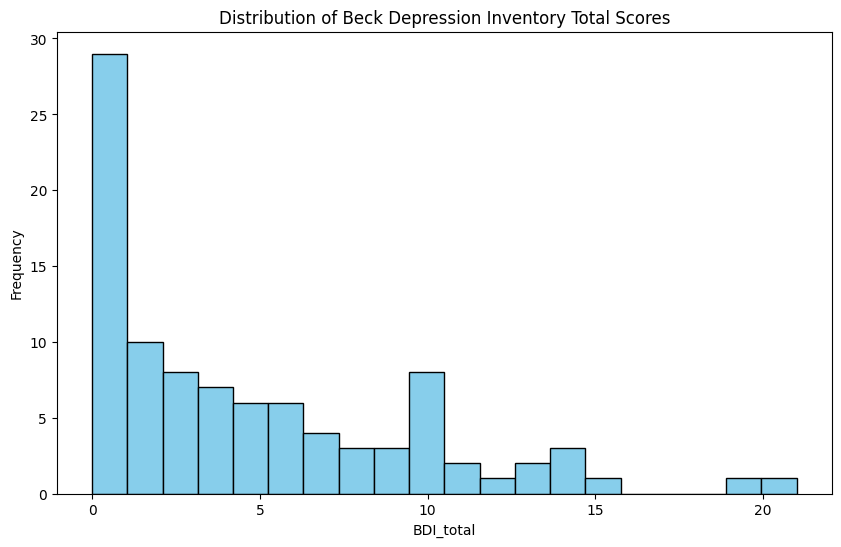

In [21]:
# Histogram for 'BDI_total'
plt.figure(figsize=(10, 6))
plt.hist(insomnia_data['BDI_total'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Beck Depression Inventory Total Scores')
plt.xlabel('BDI_total')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Frequency table for 'ISI_1'
#ISI_1_freq = insomnia_item_level_data['ISI_1'].value_counts()
#print('Frequency table for ISI_1:')
#print(ISI_1_freq)
#print('\n')

# Frequency table for 'PSQI_1'
#PSQI_1_freq = insomnia_item_level_data['PSQI_1'].value_counts()
#print('Frequency table for PSQI_1:')
#print(PSQI_1_freq)
#print('\n')

# Frequency table for 'BDI_1'
#BDI_1_freq = insomnia_item_level_data['BDI_1'].value_counts()
#print('Frequency table for BDI_1:')
#print(BDI_1_freq)

In [23]:
# Print the first few rows of insomnia_item_level_data
insomnia_item_level_data.head()

,Unnamed: 0,Pittsburgh Sleep Quality Index (PSQI),Pittsburgh Sleep Quality Index (PSQI).1,Pittsburgh Sleep Quality Index (PSQI).2,Pittsburgh Sleep Quality Index (PSQI).3,Pittsburgh Sleep Quality Index (PSQI).4,Pittsburgh Sleep Quality Index (PSQI).5,Pittsburgh Sleep Quality Index (PSQI).6,Pittsburgh Sleep Quality Index (PSQI).7,Pittsburgh Sleep Quality Index (PSQI).8,Pittsburgh Sleep Quality Index (PSQI).9,Pittsburgh Sleep Quality Index (PSQI).10,Pittsburgh Sleep Quality Index (PSQI).11,Pittsburgh Sleep Quality Index (PSQI).12,Pittsburgh Sleep Quality Index (PSQI).13,Pittsburgh Sleep Quality Index (PSQI).14,Pittsburgh Sleep Quality Index (PSQI).15,Pittsburgh Sleep Quality Index (PSQI).16,Pittsburgh Sleep Quality Index (PSQI).17,Pittsburgh Sleep Quality Index (PSQI).18,Pittsburgh Sleep Quality Index (PSQI).19,Pittsburgh Sleep Quality Index (PSQI).20,Insomnia Severity Index (ISI),Insomnia Severity Index (ISI).1,Insomnia Severity Index (ISI).2,Insomnia Severity Index (ISI).3,Insomnia Severity Index (ISI).4,Insomnia Severity Index (ISI).5,Insomnia Severity Index (ISI).6,Adverse Childhood Experiences (ACE),Adverse Childhood Experiences (ACE).1,Adverse Childhood Experiences (ACE).2,Adverse Childhood Experiences (ACE).3,Adverse Childhood Experiences (ACE).4,Adverse Childhood Experiences (ACE).5,Adverse Childhood Experiences (ACE).6,Adverse Childhood Experiences (ACE).7,Adverse Childhood Experiences (ACE).8,Adverse Childhood Experiences (ACE).9,Beck Depression Inventory (BDI),Beck Depression Inventory (BDI).1,Beck Depression Inventory (BDI).2,Beck Depression Inventory (BDI).3,Beck Depression Inventory (BDI).4,Beck Depression Inventory (BDI).5,Beck Depression Inventory (BDI).6,Beck Depression Inventory (BDI).7,Beck Depression Inventory (BDI).8,Beck Depression Inventory (BDI).9,Beck Depression Inventory (BDI).10,Beck Depression Inventory (BDI).11,Beck Depression Inventory (BDI).12,Beck Depression Inventory (BDI).13,Beck Depression Inventory (BDI).14,Beck Depression Inventory (BDI).15,Beck Depression Inventory (BDI).16,Beck Depression Inventory (BDI).17,Beck Depression Inventory (BDI).18,Beck Depression Inventory (BDI).19,Beck Depression Inventory (BDI).20,Adolescent Stress Questionnaire (ASQ),Adolescent Stress Questionnaire (ASQ).1,Adolescent Stress Questionnaire (ASQ).2,Adolescent Stress Questionnaire (ASQ).3,Adolescent Stress Questionnaire (ASQ).4,Adolescent Stress Questionnaire (ASQ).5,Adolescent Stress Questionnaire (ASQ).6,Adolescent Stress Questionnaire (ASQ).7,Adolescent Stress Questionnaire (ASQ).8,Adolescent Stress Questionnaire (ASQ).9,Adolescent Stress Questionnaire (ASQ).10,Adolescent Stress Questionnaire (ASQ).11,Adolescent Stress Questionnaire (ASQ).12,Adolescent Stress Questionnaire (ASQ).13,Adolescent Stress Questionnaire (ASQ).14,Adolescent Stress Questionnaire (ASQ).15,Adolescent Stress Questionnaire (ASQ).16,Adolescent Stress Questionnaire (ASQ).17,Adolescent Stress Questionnaire (ASQ).18,Adolescent Stress Questionnaire (ASQ).19,Adolescent Stress Questionnaire (ASQ).20,Adolescent Stress Questionnaire (ASQ).21,Adolescent Stress Questionnaire (ASQ).22,Adolescent Stress Questionnaire (ASQ).23,Adolescent Stress Questionnaire (ASQ).24,Adolescent Stress Questionnaire (ASQ).25,Adolescent Stress Questionnaire (ASQ).26,Adolescent Stress Questionnaire (ASQ).27,Adolescent Stress Questionnaire (ASQ).28,Adolescent Stress Questionnaire (ASQ).29,Adolescent Stress Questionnaire (ASQ).30,Adolescent Stress Questionnaire (ASQ).31,Adolescent Stress Questionnaire (ASQ).32,Adolescent Stress Questionnaire (ASQ).33,Adolescent Stress Questionnaire (ASQ).34,Adolescent Stress Questionnaire (ASQ).35,Adolescent Stress Questionnaire (ASQ).36,Adolescent Stress Questionnaire (ASQ).37,Adolescent Stress Questionnaire (ASQ).38,Adolescent Stress Questionnaire (ASQ).39,Adolescent Stress Questionnaire (ASQ).40,Adolescent Stress Questionnaire (ASQ).41,Adolescent Stress Questionnaire (ASQ).42,Adolescent Stress Questionnaire (ASQ).43,Adolescent Stress Questi

# Exploring the item-level data.

In [24]:
#print(insomnia_item_level_data.head(5))

#print(insomnia_item_level_data.columns)

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target
features = insomnia_data[['Age', 'ISI_total', 'PSQI_total', 'BDI_total']]
target = insomnia_data['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

Accuracy Score: 0.6842105263157895
Confusion Matrix:
[[10  0]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9

    accuracy                           0.68        19
   macro avg       0.81      0.67      0.63        19
weighted avg       0.80      0.68      0.64        19



Accuracy Score: 0.631578947368421
Confusion Matrix:
[[9 1]
 [6 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72        10
           1       0.75      0.33      0.46         9

    accuracy                           0.63        19
   macro avg       0.68      0.62      0.59        19
weighted avg       0.67      0.63      0.60        19



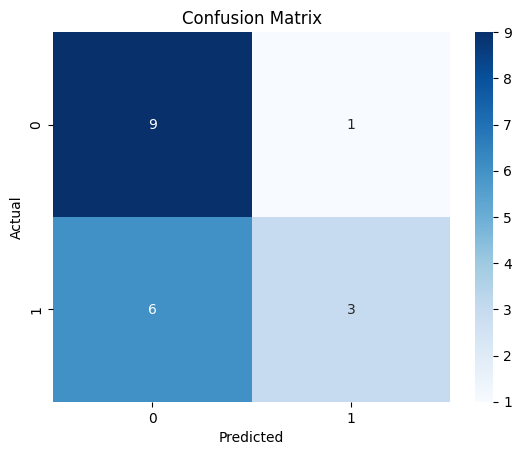

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Select features and target
features = insomnia_data[['Age', 'ISI_total', 'PSQI_total', 'BDI_total', 'STAI_Y_total', 'NEO_neuroticism']]
target = insomnia_data['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Analysis

In this analysis, we used logistic regression to predict the 'Sex' of the individuals based on their 'Age', 'ISI_total', 'PSQI_total', 'BDI_total', 'STAI_Y_total', and 'NEO_neuroticism'. These features were chosen based on their potential relevance to the target variable.

The data was split into a training set (80% of the data) and a test set (20% of the data). The model was trained on the training set and then used to make predictions on the test set.

The accuracy of the model was calculated as the proportion of correct predictions out of all predictions. In this case, the accuracy was approximately 0.63, which means that the model correctly predicted the 'Sex' of the individuals about 63% of the time.

The confusion matrix provides a more detailed view of the model's performance. It shows the number of true positive, true negative, false positive, and false negative predictions. In this case, the model made more correct predictions for 'Sex' = 0 than for 'Sex' = 1.

The classification report provides additional metrics such as precision, recall, and F1 score for each class. These metrics provide more insight into the model's performance, especially in cases where the classes are imbalanced.

Please note that this is a very basic model and the choice of features is arbitrary. In a real-world scenario, you would want to spend more time on feature selection, data preprocessing, and model tuning to achieve the best results.

Accuracy Score: 0.6842105263157895
Confusion Matrix:
[[10  0]
 [ 6  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       1.00      0.33      0.50         9

    accuracy                           0.68        19
   macro avg       0.81      0.67      0.63        19
weighted avg       0.80      0.68      0.64        19



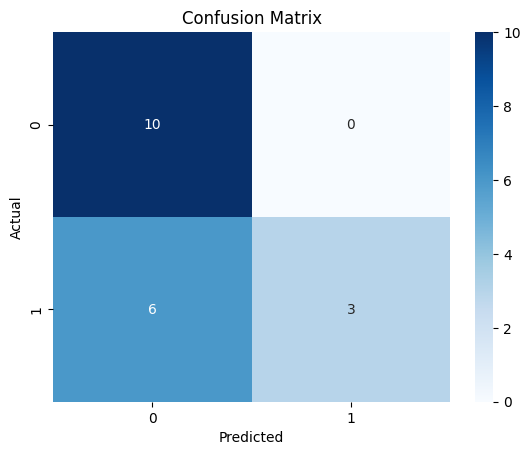

In [27]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select features and target
features = insomnia_data[['Age', 'ISI_total', 'PSQI_total', 'BDI_total']]
target = insomnia_data['Sex']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy score
print('Accuracy Score:', accuracy)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Analysis

In this analysis, we used logistic regression to predict the 'Sex' of the individuals based on their 'Age', 'ISI_total', 'PSQI_total', and 'BDI_total'. These features were chosen based on their potential relevance to the target variable.

The data was split into a training set (80% of the data) and a test set (20% of the data). The model was trained on the training set and then used to make predictions on the test set.

The accuracy of the model was calculated as the proportion of correct predictions out of all predictions. In this case, the accuracy was approximately 0.68, which means that the model correctly predicted the 'Sex' of the individuals about 68% of the time.

The confusion matrix provides a more detailed view of the model's performance. It shows the number of true positive, true negative, false positive, and false negative predictions. In this case, the model made more correct predictions for 'Sex' = 0 than for 'Sex' = 1.

The classification report provides additional metrics such as precision, recall, and F1 score for each class. These metrics provide more insight into the model's performance, especially in cases where the classes are imbalanced.

Please note that this is a very basic model and the choice of features is arbitrary. In a real-world scenario, you would want to spend more time on feature selection, data preprocessing, and model tuning to achieve the best results.

## Feature Selection

In this section, we select the features for our logistic regression model. For this preliminary analysis, we are using 'Age', 'ISI_total', 'PSQI_total', and 'BDI_total' as our features. These variables represent the age of the participants and their total scores on the Insomnia Severity Index (ISI), the Pittsburgh Sleep Quality Index (PSQI), and the Beck Depression Inventory (BDI), respectively.

These features were chosen based on their potential relevance to the target variable, which is 'Sex'. However, in a more comprehensive analysis, we would want to use domain knowledge and possibly feature selection techniques to choose the most predictive features.

## Model Training and Evaluation

In this section, we train our logistic regression model and evaluate its performance. We first split the data into a training set and a test set. We then fit the model to the training data and use it to make predictions on the test data.

We evaluate the model's performance using several metrics, including accuracy, precision, recall, and the F1 score. We also generate a confusion matrix to visualize the model's performance.

## Second Model: Additional Features

In this section, we train a second logistic regression model using additional features. Specifically, we include 'NEO_neuroticism', 'NEO_extraversion', 'NEO_openness', 'NEO_agreeableness', and 'NEO_Conscientiousness' in our feature set. These variables represent the participants' scores on the five dimensions of the NEO Personality Inventory.

We follow the same process as before to train and evaluate the model. We also generate a confusion matrix and calculate the same performance metrics.

## Conclusion and Future Directions

This notebook presented a preliminary analysis of the Adolescent Insomnia Study dataset. We trained two logistic regression models to predict the sex of the participants based on various clinical measures. The first model used 'Age', 'ISI_total', 'PSQI_total', and 'BDI_total' as features, while the second model included additional features from the NEO Personality Inventory.

Both models achieved reasonable performance, but there is room for improvement. In future analyses, we could consider using more advanced machine learning techniques, such as ensemble methods or deep learning. We could also explore other aspects of the data, such as the item-level data or the relationships between different clinical measures.

Working with this dataset presented several challenges, including the need to understand the structure of the data and the meaning of the variables. However, it also provided a valuable opportunity to apply data analysis and machine learning techniques to real-world data.